# CONVERGENCE ANALYSIS

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as sl
# the following allows us to plot triangles indicating convergence order
from mpltools import annotation

# font sizes for plots
plt.rcParams['font.size'] = 12
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial', 'Dejavu Sans']

## Comparisons between centres of mass

The aim of this analysis is to compare different variables related to the centre of mass (excluding boundaries particles) when:
- the resolution changes (i.e. $\Delta x$ changes);
- the number of elements in the domain changes, keeping the resolution at the same level.

Every simulation was run until $t=3$ and all the measurements were done at that time. The comparison is done with measurements from a "relatively" fine resolution with $\Delta x = 0.05$.

### Changes in dx

### Position

From the graph below we can see that the length of the position vector from $(0,0)$ to the centre of mass converges with approximately a second order when decreasing $\Delta x$. The same happens for the two components of $x$.

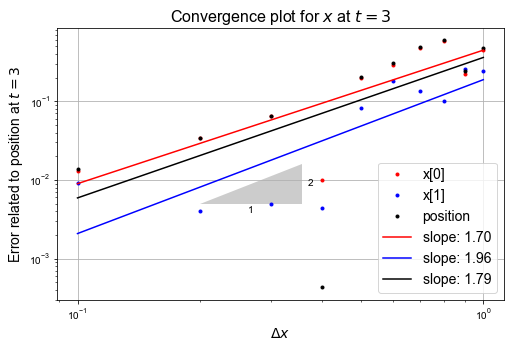

In [13]:
dx = [1, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1]
x0 = [0.4497, 0.2225, 0.5897, 0.4752, 0.2882, 0.195, 0.01, 0.0657, 0.0337, 0.0131]
x1 = [0.2442, 0.257574, 0.09967, 0.133539, 0.180445, 0.08253, 0.00445, 0.00496, 0.00406, 0.00927]
position = [0.46934259, 0.243844642, 0.596482501, 0.485520467, 0.303228784, 0.201874103, 0.000430195, 0.064909365, 0.033934468, 0.01393603]

fig, ax1 = plt.subplots(1, 1, figsize=(8, 5))
ax1.loglog(dx, x0, 'r.', label='x[0]')
ax1.loglog(dx, x1, 'b.', label='x[1]')
ax1.loglog(dx, position, 'k.', label='position')
ax1.set_xlabel('$\Delta x$', fontsize=14)
ax1.set_ylabel('Error related to position at $t=3$', fontsize=14)
ax1.set_title('Convergence plot for $x$ at $t=3$', fontsize=16)
ax1.grid(True)
annotation.slope_marker((2e-1, 5e-3), (2, 1), ax=ax1, size_frac=0.23, pad_frac=0.05)

# find best fit linear line to data
start_fit = 0

line_fit_x0 = np.polyfit(np.log(dx[start_fit:]), np.log(x0[start_fit:]), 1)
line_fit_x1 = np.polyfit(np.log(dx[start_fit:]), np.log(x1[start_fit:]), 1)
line_fit_position = np.polyfit(np.log(dx[start_fit:]), np.log(position[start_fit:]), 1)
ax1.loglog(dx, np.exp(line_fit_x0[1]) * dx**(line_fit_x0[0]), 'r-', 
           label = 'slope: {:.2f}'.format(line_fit_x0[0]))
ax1.loglog(dx, np.exp(line_fit_x1[1]) * dx**(line_fit_x1[0]), 'b-', 
           label = 'slope: {:.2f}'.format(line_fit_x1[0]))
ax1.loglog(dx, np.exp(line_fit_position[1]) * dx**(line_fit_position[0]), 'k-', 
           label = 'slope: {:.2f}'.format(line_fit_position[0]))

ax1.legend(loc='best', fontsize=14)

### Velocity and acceleration

For velocity and acceleration, the convergence analysis does not lead to interesting results. This could be because changes in $\Delta x$ cause changes in the number of particles and therefore a measurement of velocity or acceleration can be randomly closer or not to the finer case. We can however notice that the $y$ component of the velocity seems to improve when increasing the resolution.

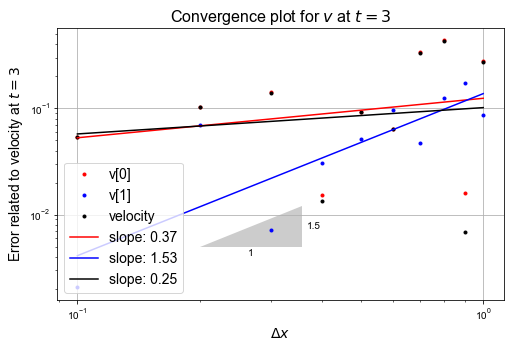

In [18]:
dx = [1, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1]
v0 = [0.276369, 0.01603, 0.436959, 0.338715, 0.064444, 0.091879, 0.015315, 0.141082, 0.102803, 0.05358]
v1 = [0.0862017, 0.1729332, 0.1248471, 0.0471538, 0.0965404, 0.0515041, 0.0306607, 0.0070812, 0.0696404, 0.0020615]
velocity = [0.275489869, 0.006787895, 0.429864508, 0.33276521, 0.063371339, 0.092679886, 0.013367576, 0.140504296, 0.10312033, 0.053618518]

fig, ax1 = plt.subplots(1, 1, figsize=(8, 5))
ax1.loglog(dx, v0, 'r.', label='v[0]')
ax1.loglog(dx, v1, 'b.', label='v[1]')
ax1.loglog(dx, velocity, 'k.', label='velocity')
ax1.set_xlabel('$\Delta x$', fontsize=14)
ax1.set_ylabel('Error related to velocity at $t=3$', fontsize=14)
ax1.set_title('Convergence plot for $v$ at $t=3$', fontsize=16)
ax1.grid(True)
annotation.slope_marker((2e-1, 5e-3), (1.5, 1), ax=ax1, size_frac=0.23, pad_frac=0.05)

# find best fit linear line to data
start_fit = 0

line_fit_v0 = np.polyfit(np.log(dx[start_fit:]), np.log(v0[start_fit:]), 1)
line_fit_v1 = np.polyfit(np.log(dx[start_fit:]), np.log(v1[start_fit:]), 1)
line_fit_velocity = np.polyfit(np.log(dx[start_fit:]), np.log(velocity[start_fit:]), 1)
ax1.loglog(dx, np.exp(line_fit_v0[1]) * dx**(line_fit_v0[0]), 'r-', 
           label = 'slope: {:.2f}'.format(line_fit_v0[0]))
ax1.loglog(dx, np.exp(line_fit_v1[1]) * dx**(line_fit_v1[0]), 'b-', 
           label = 'slope: {:.2f}'.format(line_fit_v1[0]))
ax1.loglog(dx, np.exp(line_fit_velocity[1]) * dx**(line_fit_velocity[0]), 'k-', 
           label = 'slope: {:.2f}'.format(line_fit_velocity[0]))

ax1.legend(loc='best', fontsize=14)

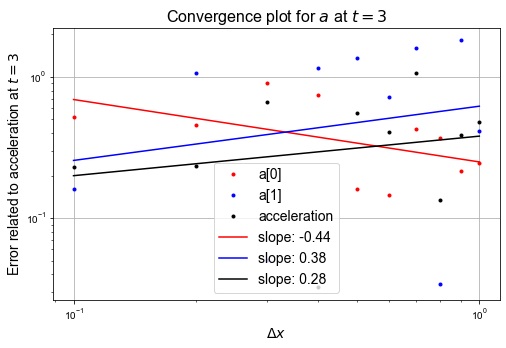

In [19]:
dx = [1, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1]
a0 = [0.245874, 0.215933, 0.36783, 0.428153, 0.146128, 0.159833, 0.739793, 0.908353, 0.459523, 0.524283]
a1 = [0.416635, 1.816766, 0.03389, 1.593741, 0.725285, 1.36068, 1.149667, 0.05062, 1.070852, 0.16]
acceleration = [0.483166702, 0.389549087, 0.133801741, 1.062612357, 0.407893651, 0.555520054, 0.032336635, 0.660885506, 0.233783347, 0.229686248]

fig, ax1 = plt.subplots(1, 1, figsize=(8, 5))
ax1.loglog(dx, a0, 'r.', label='a[0]')
ax1.loglog(dx, a1, 'b.', label='a[1]')
ax1.loglog(dx, acceleration, 'k.', label='acceleration')
ax1.set_xlabel('$\Delta x$', fontsize=14)
ax1.set_ylabel('Error related to acceleration at $t=3$', fontsize=14)
ax1.set_title('Convergence plot for $a$ at $t=3$', fontsize=16)
ax1.grid(True)
#annotation.slope_marker((2e-1, 5e-3), (1.5, 1), ax=ax1, size_frac=0.23, pad_frac=0.05)

# find best fit linear line to data
start_fit = 0

line_fit_a0 = np.polyfit(np.log(dx[start_fit:]), np.log(a0[start_fit:]), 1)
line_fit_a1 = np.polyfit(np.log(dx[start_fit:]), np.log(a1[start_fit:]), 1)
line_fit_acceleration = np.polyfit(np.log(dx[start_fit:]), np.log(acceleration[start_fit:]), 1)
ax1.loglog(dx, np.exp(line_fit_a0[1]) * dx**(line_fit_a0[0]), 'r-', 
           label = 'slope: {:.2f}'.format(line_fit_a0[0]))
ax1.loglog(dx, np.exp(line_fit_a1[1]) * dx**(line_fit_a1[0]), 'b-', 
           label = 'slope: {:.2f}'.format(line_fit_a1[0]))
ax1.loglog(dx, np.exp(line_fit_acceleration[1]) * dx**(line_fit_acceleration[0]), 'k-', 
           label = 'slope: {:.2f}'.format(line_fit_acceleration[0]))

ax1.legend(loc='best', fontsize=14)

### Density (rho) and drho

For this two values the analysis is even worse in terms of results. Since the density is a value related only to the particles, the way we did the analysis was with the values of $rho$ and $drho$ of the closest particle to the center of mass. Of course this measumerent is completely random and does not follow any trend.

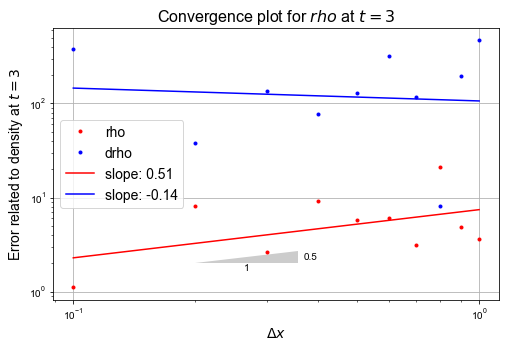

In [25]:
dx = [1, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1]
rho = [3.64, 4.9, 21.02, 3.11, 6.02, 5.82, 9.24, 2.65, 8.1, 1.11]
drho = [469.8297, 195.6897, 8.0904, 116.0933, 318.0127, 130.8603, 78.2069, 134.5273, 37.9913, 384.2097]

fig, ax1 = plt.subplots(1, 1, figsize=(8, 5))
ax1.loglog(dx, rho, 'r.', label='rho')
ax1.loglog(dx, drho, 'b.', label='drho')
ax1.set_xlabel('$\Delta x$', fontsize=14)
ax1.set_ylabel('Error related to density at $t=3$', fontsize=14)
ax1.set_title('Convergence plot for $rho$ at $t=3$', fontsize=16)
ax1.grid(True)
annotation.slope_marker((2e-1, 2), (0.5, 1), ax=ax1, size_frac=0.23, pad_frac=0.05)

# find best fit linear line to data
start_fit = 0

line_fit_rho = np.polyfit(np.log(dx[start_fit:]), np.log(rho[start_fit:]), 1)
line_fit_drho = np.polyfit(np.log(dx[start_fit:]), np.log(drho[start_fit:]), 1)
ax1.loglog(dx, np.exp(line_fit_rho[1]) * dx**(line_fit_rho[0]), 'r-', 
           label = 'slope: {:.2f}'.format(line_fit_rho[0]))
ax1.loglog(dx, np.exp(line_fit_drho[1]) * dx**(line_fit_drho[0]), 'b-', 
           label = 'slope: {:.2f}'.format(line_fit_drho[0]))

ax1.legend(loc='best', fontsize=14)

### Changes in the number of elements (dx = 0.6)

For this analysis, it seems we are having more interesting results. The position vector and the $x$ value of the center of mass seems to be more accurate for bigger numbers of elements. But all the other measurements, especially for values in the $y$ directions, converge with high orders for domains with less particles. This behaviour can be related to the fact that, when there are lots of particles, with a "not fine" resolution it is harder to produce an accurate result. The smaller the number of particles, the smaller the number of interactions between them. Therefore, with less elements, the simulation is more accurate.

### Position

The position analysis is the only one that does not respect this behaviour. The $x$ value and the position vector of the center of mass converge with a higher number of elements. However, the $y$ value has a completely different behaviour, which reflects all the measurements for other variables related to the center of mass.

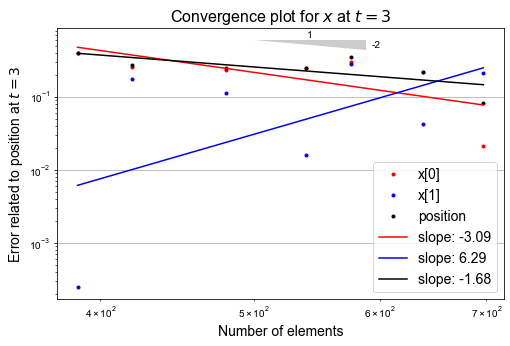

In [34]:
dx = [387, 419, 480, 539, 575, 639, 697]
x0 = [0.4009, 0.2545, 0.2352, 0.2481, 0.2959, 0.2174, 0.0209]
x1 = [0.000249, 0.176385, 0.11097, 0.01577, 0.27626, 0.04232, 0.21353]
position = [0.400189592, 0.269294316, 0.247663012, 0.247052207, 0.34636264, 0.221084966, 0.082232739]

fig, ax1 = plt.subplots(1, 1, figsize=(8, 5))
ax1.loglog(dx, x0, 'r.', label='x[0]')
ax1.loglog(dx, x1, 'b.', label='x[1]')
ax1.loglog(dx, position, 'k.', label='position')
ax1.set_xlabel('Number of elements', fontsize=14)
ax1.set_ylabel('Error related to position at $t=3$', fontsize=14)
ax1.set_title('Convergence plot for $x$ at $t=3$', fontsize=16)
ax1.grid(True)
annotation.slope_marker((5e2, 6e-1), (-2, 1), ax=ax1, size_frac=0.25, pad_frac=0.05)

# find best fit linear line to data
start_fit = 0

line_fit_x0 = np.polyfit(np.log(dx[start_fit:]), np.log(x0[start_fit:]), 1)
line_fit_x1 = np.polyfit(np.log(dx[start_fit:]), np.log(x1[start_fit:]), 1)
line_fit_position = np.polyfit(np.log(dx[start_fit:]), np.log(position[start_fit:]), 1)
ax1.loglog(dx, np.exp(line_fit_x0[1]) * dx**(line_fit_x0[0]), 'r-', 
           label = 'slope: {:.2f}'.format(line_fit_x0[0]))
ax1.loglog(dx, np.exp(line_fit_x1[1]) * dx**(line_fit_x1[0]), 'b-', 
           label = 'slope: {:.2f}'.format(line_fit_x1[0]))
ax1.loglog(dx, np.exp(line_fit_position[1]) * dx**(line_fit_position[0]), 'k-', 
           label = 'slope: {:.2f}'.format(line_fit_position[0]))

ax1.legend(loc='best', fontsize=14)

### Velocity

For the velocity, both the two components and the velocity vector converge for smaller numbers of elements. However, the $y$ component clearly converges with a way higher order than the other two.

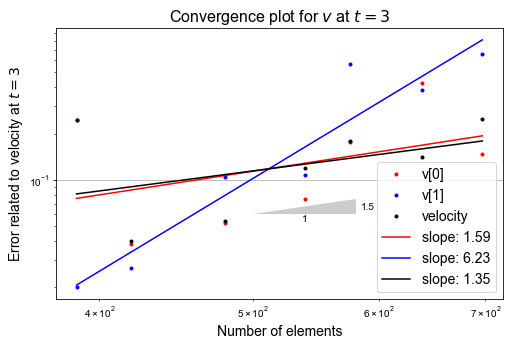

In [38]:
dx = [387, 419, 480, 539, 575, 639, 697]
v0 = [0.24559, 0.038359, 0.052394, 0.074917, 0.1757096, 0.428153, 0.147971]
v1 = [0.0201271, 0.0269, 0.1043279, 0.1070289, 0.563881, 0.3846309, 0.653112]
velocity = [0.244942529, 0.039748991, 0.05397344, 0.119235645, 0.179506958, 0.141367929, 0.246827728]

fig, ax1 = plt.subplots(1, 1, figsize=(8, 5))
ax1.loglog(dx, v0, 'r.', label='v[0]')
ax1.loglog(dx, v1, 'b.', label='v[1]')
ax1.loglog(dx, velocity, 'k.', label='velocity')
ax1.set_xlabel('Number of elements', fontsize=14)
ax1.set_ylabel('Error related to velocity at $t=3$', fontsize=14)
ax1.set_title('Convergence plot for $v$ at $t=3$', fontsize=16)
ax1.grid(True)
annotation.slope_marker((5e2, 6e-2), (1.5, 1), ax=ax1, size_frac=0.23, pad_frac=0.05)

# find best fit linear line to data
start_fit = 0

line_fit_v0 = np.polyfit(np.log(dx[start_fit:]), np.log(v0[start_fit:]), 1)
line_fit_v1 = np.polyfit(np.log(dx[start_fit:]), np.log(v1[start_fit:]), 1)
line_fit_velocity = np.polyfit(np.log(dx[start_fit:]), np.log(velocity[start_fit:]), 1)
ax1.loglog(dx, np.exp(line_fit_v0[1]) * dx**(line_fit_v0[0]), 'r-', 
           label = 'slope: {:.2f}'.format(line_fit_v0[0]))
ax1.loglog(dx, np.exp(line_fit_v1[1]) * dx**(line_fit_v1[0]), 'b-', 
           label = 'slope: {:.2f}'.format(line_fit_v1[0]))
ax1.loglog(dx, np.exp(line_fit_velocity[1]) * dx**(line_fit_velocity[0]), 'k-', 
           label = 'slope: {:.2f}'.format(line_fit_velocity[0]))

ax1.legend(loc='best', fontsize=14)

### Acceleration

For the acceleration we have a more homogeneous behaviour for the three variables measured. The order of convergence for the two acceleration components is near to $4$, while the acceleration position has an order a little bit higher than $2$.

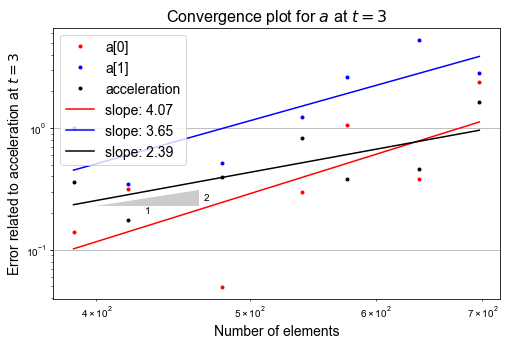

In [44]:
dx = [387, 419, 480, 539, 575, 639, 697]
a0 = [0.138904, 0.313395, 0.049519, 0.297072, 1.062487, 0.3812327, 2.38971]
a1 = [0.990654, 0.345567, 0.516946, 1.226236, 2.61143, 5.2834, 2.816911]
acceleration = [0.362030312, 0.174110304, 0.397105949, 0.831850431, 0.38179608, 0.464608143, 1.648051311]

fig, ax1 = plt.subplots(1, 1, figsize=(8, 5))
ax1.loglog(dx, a0, 'r.', label='a[0]')
ax1.loglog(dx, a1, 'b.', label='a[1]')
ax1.loglog(dx, acceleration, 'k.', label='acceleration')
ax1.set_xlabel('Number of elements', fontsize=14)
ax1.set_ylabel('Error related to acceleration at $t=3$', fontsize=14)
ax1.set_title('Convergence plot for $a$ at $t=3$', fontsize=16)
ax1.grid(True)
annotation.slope_marker((4e2, 2.3e-1), (2, 1), ax=ax1, size_frac=0.23, pad_frac=0.05)

# find best fit linear line to data
start_fit = 0

line_fit_a0 = np.polyfit(np.log(dx[start_fit:]), np.log(a0[start_fit:]), 1)
line_fit_a1 = np.polyfit(np.log(dx[start_fit:]), np.log(a1[start_fit:]), 1)
line_fit_acceleration = np.polyfit(np.log(dx[start_fit:]), np.log(acceleration[start_fit:]), 1)
ax1.loglog(dx, np.exp(line_fit_a0[1]) * dx**(line_fit_a0[0]), 'r-', 
           label = 'slope: {:.2f}'.format(line_fit_a0[0]))
ax1.loglog(dx, np.exp(line_fit_a1[1]) * dx**(line_fit_a1[0]), 'b-', 
           label = 'slope: {:.2f}'.format(line_fit_a1[0]))
ax1.loglog(dx, np.exp(line_fit_acceleration[1]) * dx**(line_fit_acceleration[0]), 'k-', 
           label = 'slope: {:.2f}'.format(line_fit_acceleration[0]))

ax1.legend(loc='best', fontsize=14)

### Density (rho) and drho

Both $rho$ and $drho$ convergence almost with a 5th-order.

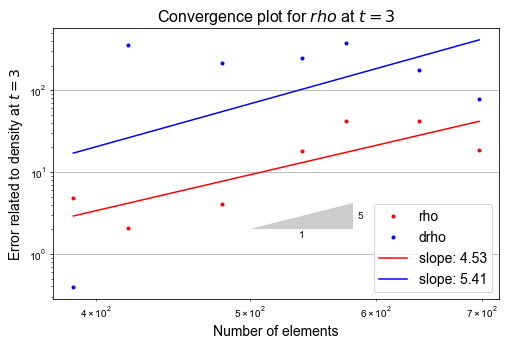

In [46]:
dx = [387, 419, 480, 539, 575, 639, 697]
rho = [4.85, 2.08, 4.05, 18.22, 42.57, 41.68, 18.82]
drho = [0.39452, 356.004, 216.818, 245.8217, 372.846, 176.7835, 77.9899]

fig, ax1 = plt.subplots(1, 1, figsize=(8, 5))
ax1.loglog(dx, rho, 'r.', label='rho')
ax1.loglog(dx, drho, 'b.', label='drho')
ax1.set_xlabel('Number of elements', fontsize=14)
ax1.set_ylabel('Error related to density at $t=3$', fontsize=14)
ax1.set_title('Convergence plot for $rho$ at $t=3$', fontsize=16)
ax1.grid(True)
annotation.slope_marker((5e2, 2), (5, 1), ax=ax1, size_frac=0.23, pad_frac=0.05)

# find best fit linear line to data
start_fit = 0

line_fit_rho = np.polyfit(np.log(dx[start_fit:]), np.log(rho[start_fit:]), 1)
line_fit_drho = np.polyfit(np.log(dx[start_fit:]), np.log(drho[start_fit:]), 1)
ax1.loglog(dx, np.exp(line_fit_rho[1]) * dx**(line_fit_rho[0]), 'r-', 
           label = 'slope: {:.2f}'.format(line_fit_rho[0]))
ax1.loglog(dx, np.exp(line_fit_drho[1]) * dx**(line_fit_drho[0]), 'b-', 
           label = 'slope: {:.2f}'.format(line_fit_drho[0]))

ax1.legend(loc='best', fontsize=14)

## Comparisons between wave peaks

The aim of this analysis is to compare different variables related to the peaks reached when the resolution changes (i.e. $\Delta x$ changes).

Every simulation was run until $t=3$ and all the measurements were done at that time. The comparison is done with measurements from a "relatively" fine resolution with $\Delta x = 0.1$.

### Position

Both the $x$ and $y$ value of the peak converge with an almost 2nd-order.

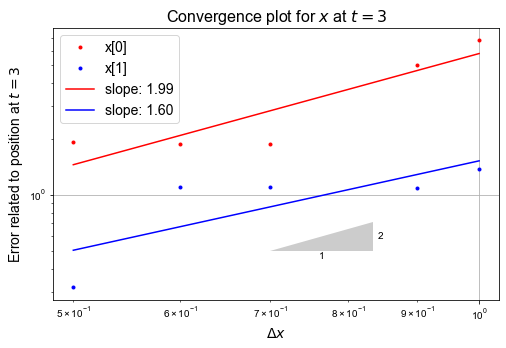

In [52]:
x0_in = 19.610161
x1_in = 4.256377

dx = [1, 0.9, 0.7, 0.6, 0.5]
x0 = [abs(12.795582-x0_in), abs(14.570876-x0_in), abs(17.725793-x0_in), abs(17.725793-x0_in), abs(17.695031-x0_in)]
x1 = [abs(2.886488-x1_in), abs(3.164916-x1_in), abs(3.158486-x1_in), abs(3.158486-x1_in), abs(3.939792-x1_in)]

fig, ax1 = plt.subplots(1, 1, figsize=(8, 5))
ax1.loglog(dx, x0, 'r.', label='x[0]')
ax1.loglog(dx, x1, 'b.', label='x[1]')
ax1.set_xlabel('$\Delta x$', fontsize=14)
ax1.set_ylabel('Error related to position at $t=3$', fontsize=14)
ax1.set_title('Convergence plot for $x$ at $t=3$', fontsize=16)
ax1.grid(True)
annotation.slope_marker((7e-1, 5e-1), (2, 1), ax=ax1, size_frac=0.23, pad_frac=0.05)

# find best fit linear line to data
start_fit = 0

line_fit_x0 = np.polyfit(np.log(dx[start_fit:]), np.log(x0[start_fit:]), 1)
line_fit_x1 = np.polyfit(np.log(dx[start_fit:]), np.log(x1[start_fit:]), 1)
ax1.loglog(dx, np.exp(line_fit_x0[1]) * dx**(line_fit_x0[0]), 'r-', 
          label = 'slope: {:.2f}'.format(line_fit_x0[0]))
ax1.loglog(dx, np.exp(line_fit_x1[1]) * dx**(line_fit_x1[0]), 'b-', 
          label = 'slope: {:.2f}'.format(line_fit_x1[0]))

ax1.legend(loc='best', fontsize=14)

### Velocity

Also the $x$ and $y$ components of the velocity converge for a finer resolution. We can however see that the $x$ component does not improve as much as the $y$ component does. As a consequence, improving the resolution does not mean improving a lot the $x$ component of the velocity, but it means to improve a lot the $y$ one (with an order of convergence of almost $4$).

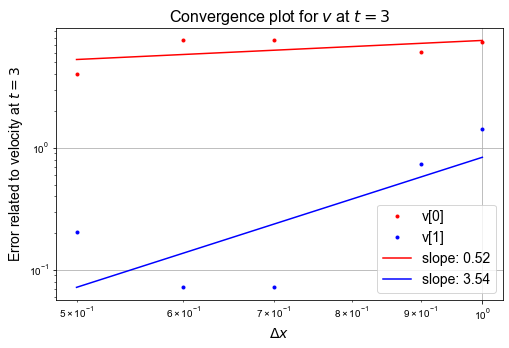

In [53]:
x0_in = 8.441288
x1_in = 1.076729

dx = [1, 0.9, 0.7, 0.6, 0.5]
x0 = [abs(1.070133-x0_in), abs(2.312139-x0_in), abs(0.839408-x0_in), abs(0.839408-x0_in), abs(4.404251-x0_in)]
x1 = [abs(-0.358817-x1_in), abs(0.341137-x1_in), abs(1.004885-x1_in), abs(1.004885-x1_in), abs(0.870988-x1_in)]

fig, ax1 = plt.subplots(1, 1, figsize=(8, 5))
ax1.loglog(dx, x0, 'r.', label='v[0]')
ax1.loglog(dx, x1, 'b.', label='v[1]')
ax1.set_xlabel('$\Delta x$', fontsize=14)
ax1.set_ylabel('Error related to velocity at $t=3$', fontsize=14)
ax1.set_title('Convergence plot for $v$ at $t=3$', fontsize=16)
ax1.grid(True)
#annotation.slope_marker((7e-1, 5e-1), (2, 1), ax=ax1, size_frac=0.23, pad_frac=0.05)

# find best fit linear line to data
start_fit = 0

line_fit_x0 = np.polyfit(np.log(dx[start_fit:]), np.log(x0[start_fit:]), 1)
line_fit_x1 = np.polyfit(np.log(dx[start_fit:]), np.log(x1[start_fit:]), 1)
ax1.loglog(dx, np.exp(line_fit_x0[1]) * dx**(line_fit_x0[0]), 'r-', 
          label = 'slope: {:.2f}'.format(line_fit_x0[0]))
ax1.loglog(dx, np.exp(line_fit_x1[1]) * dx**(line_fit_x1[0]), 'b-', 
          label = 'slope: {:.2f}'.format(line_fit_x1[0]))

ax1.legend(loc='best', fontsize=14)

### Pressure

The pressure does not change much with a finer resolution. In fact, it even worsens, even if just of a relatively really small amount.

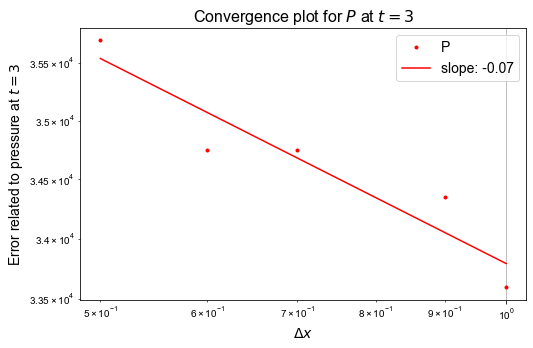

In [54]:
x0_in = 48218.884551

dx = [1, 0.9, 0.7, 0.6, 0.5]
x0 = [abs(14622.275473-x0_in), abs(13870.593406-x0_in), abs(13469.845871-x0_in), abs(13469.845871-x0_in), abs(12521.149787-x0_in)]

fig, ax1 = plt.subplots(1, 1, figsize=(8, 5))
ax1.loglog(dx, x0, 'r.', label='P')
ax1.set_xlabel('$\Delta x$', fontsize=14)
ax1.set_ylabel('Error related to pressure at $t=3$', fontsize=14)
ax1.set_title('Convergence plot for $P$ at $t=3$', fontsize=16)
ax1.grid(True)
#annotation.slope_marker((7e-1, 5e-1), (2, 1), ax=ax1, size_frac=0.23, pad_frac=0.05)

# find best fit linear line to data
start_fit = 0

line_fit_x0 = np.polyfit(np.log(dx[start_fit:]), np.log(x0[start_fit:]), 1)
ax1.loglog(dx, np.exp(line_fit_x0[1]) * dx**(line_fit_x0[0]), 'r-', 
          label = 'slope: {:.2f}'.format(line_fit_x0[0]))

ax1.legend(loc='best', fontsize=14)